# **IEOR 4404  Simulation (Fall 2019)**

**Homework 2 [Total points: 60]**

** Due: 11:59 PM, September 24**

This second homework consists of Python programming practices and the applications to statistics. In addition, we also discuss random number generator, Monte-Carlo integration, and basic inverse transform method for discrete variable. You will only need to knowledge up to lecture 7 to answer these questions.

The steps to finish in the homework:

*   Step 1: Make a copy of the file to your LionDrive.
*   Step 2: Work with the copy (an ipynb file).
*    <font color='red'>**Step 3: Rename the copy to your_uni_hw1.ipynb (For example: yd4501_hw1.ipynb).**</font>  
*   Step 4: Submit the copy on CourseWorks.

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)


**All the questions in this homework requires coding**

In [0]:
#This imports all the packages you need for the homework

#Please run this first
#we will need this for array operation
import numpy as np

#We will need this for factorial computation
import scipy.special as spsp

#We will need this for visualization
import matplotlib.pyplot as plt

#We can use this for math functions
import math

#We can use this for stats functions
import scipy.stats as stats

# Exercise 1 [Total: 40 Points]

## Setting 

The CDF of a normal distribution is defined as follows:
$$F(x)=\int_{-\infty}^x \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{(t-\mu)^2}{2\sigma^2}) dt $$

This integration does not have a closed-form solution. Usually, people use numerical methods to approximate this value. Monte-Carlo integration is one of the methods we can use. 


##Q1. [8 points]

Construct a function called `normal_cdf`. This function will take four arguments:

1. x:  this is the $x$ for $F(x)$
2. mu: the mean of the normal distribution. This parameter should take the default value=0.
3. sigma: the standard deviation of the normal distribution. This parameter should take the default value=1.
4. N: the number of samples we want to draw for this integration. This parameter should take the default value=1000.

Inside the function, your function will 

(1) conduct the monte-carlo integration based on N samples of $X$

(2) construct the 95% confidence interval for the integration result. 

The return value for this function will give

 (1) the monte-carlo integration result. 
 
 (2) the lower bound of the 95% confidence interval 
 
 (3) the upper bound of the 95% confidence interval.

Run the function and print the return values when $x=0$, $\mu=0$, $\sigma=2$, $N=1000$.

In [2]:
def normal_cdf(x, mu=0, sigma=1, N=1000):

  y=np.random.rand(N)
  ty=1+x-(1/y)
  hy = (1/(2*np.pi*sigma**2)**0.5*np.exp(-(ty-mu)**2/2/sigma**2))/y**2
  std,mean=np.std(hy, ddof=1),np.mean(hy)
  lower,upper=mean-1.96*std/N**0.5,mean+1.96*std/N**0.5
    
  return (mean,lower,upper)
  
x,y,z=normal_cdf(0,0,2,1000)

print("Monte Carlo estimate: "+str(round(x,4)))
print("Confidence interval: ["+str(round(y,4))+","+str(round(z,4))+"]")



Monte Carlo estimate: 0.4893
Confidence interval: [0.4676,0.5109]


##Q2. [8 points]
It happens that in this case, we can easily infer the true value of the CDF when $x=0$, $\mu=0$, $\sigma=2$.

Create a function called `Check_CI`. The function will take an argument `Iter`, which has default value=1000. 
The function should do the following:

1. Run the function defined in Q1 `Iter` number of times with $x=0$, $\mu=0$, $\sigma=2$ and $N=1000$

2. We will have `Iter` number of confidence intervals. Check the percentage of the confidence intervals that include the true value 

3. Return this percentage [for example 60.5]. 

Run the function with `Iter`=10000 and show the return value.

In [3]:
true_val=0.5

def Check_CI(Iter=1000):
  c=0
  for i in range(Iter):
    mean,lower,upper=normal_cdf(0,0,2,1000)
    if true_val>=lower and true_val<=upper:
      c=c+1
  
  return ((c/Iter)*100)

print(str(round(Check_CI(10000),4))+"% of confidence intervals have true value "+str(true_val))

95.12% of confidence intervals have true value 0.5


##Q3 [8 points]

Construct a function called `Recover_Shy`: The function will take argument `Iter`, which has default value=1000. 

The function should do the following:

1. Run the function defined in Q1 `Iter` number of times with $x=0$, $\mu=0$, $\sigma=2$ and $N=1000$

2. We will have `Iter` number of confidence intervals. Recover the $S_{h(y)}$ used for each confidence interval based on the return values of `normal_cdf`

3. Plot the distribution of $S_{h(y)}$'s you recovered. 

4. return an array that stores the $S_{h(y)}$'s you recovered.


Run the function with `Iter`=10000 and show the plot.

Do you have any suggestion on how to make these confidence intervals we constructed more accurate? [Hint: there is a reason I am asking you to plot the distribution of $S_{hy}$]

(array([  14.,  130.,  547., 1673., 2932., 2721., 1457.,  453.,   65.,
          8.]), array([0.32716899, 0.33129237, 0.33541576, 0.33953915, 0.34366253,
       0.34778592, 0.35190931, 0.35603269, 0.36015608, 0.36427947,
       0.36840285]), <a list of 10 Patch objects>)


array([0.34873342, 0.34336259, 0.34569594, ..., 0.34135208, 0.34829262,
       0.34214248])

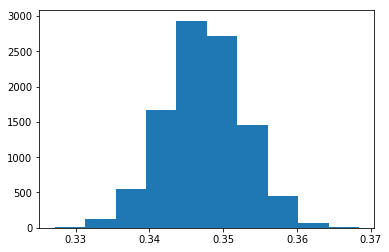

In [4]:
Iter=10000
N=1000

def Recover_Shy(Iter=1000):
  Shy=np.empty(Iter)
  
  for i in range(Iter):
    x,lower,upper=normal_cdf(0,0,2,1000)
    Shy[i]=(upper-lower)*N**0.5/(2*1.96)
  
  print(plt.hist(Shy))
  return Shy

Recover_Shy(Iter)


##Q4 [8 points]

Suppose one student suggested an alternative methods to construct the confidence interval:

Step 1: Conduct Monte-Carlo integration using $N$ samples of $y$. This will give us a Monte-Carlo integration result ($MCI$). 

Step 2: Repeat Step 1 K times. We will have K Monte-Carlo integration results. 

Step 3: Construct the Monte-Carlo integration results using 

$$\overline{MCI} \pm Z_{\alpha/2}\frac{S_{MCI}}{\sqrt{K}}$$


Construct the proposed method using a function called `proposed_method`. This function will take values N, K, x, mu, sigma as the argument. Also, this function should return three values: center of the confidence interval, lower bound of the confidence interval, upper bound of the confidence interval based on the method proposed by the student.

Run this function with N=1000, K=100, x=0, mu=0, sigma=2 and report the returned result.


In [5]:
def proposed_methods(N,K,x,mu,sigma):
  mean,std=np.empty(K),np.empty(K)
  
  for i in range(K):
    y=np.random.rand(N)
    ty=1+x-1/y
    hy=(1/(2*np.pi*sigma**2)**0.5*np.exp(-(ty-mu)**2/2/sigma**2))/y**2
    mean[i],std[i]=np.mean(hy),np.std(hy,ddof=1)

  MCI_mean,MCI_std=np.mean(mean),np.std(std,ddof = 1)
  MCI_lower,MCI_upper=MCI_mean-1.96*MCI_std/N**0.5,MCI_mean+1.96*MCI_std/N**0.5
  
  return (MCI_mean, MCI_lower, MCI_upper)

x,y,z=proposed_methods(1000,100,0,0,2)
print("Centre of CI="+str(round(x,4))+"\nLower Bound of CI="+str(round(y,4))+"\nUpper Bound of CI="+str(round(z,4)))

Centre of CI=0.4992
Lower Bound of CI=0.4988
Upper Bound of CI=0.4995


##Q5 [8 points]

Fill in the following function. 

Inside the function, please do the following 

(1)  Run the methods in Q1 and Q4 100 times. 

(2)  For Q4 method, use N=1000, K=100, x=0, mu=0, sigma=2. For Q1 method, use N, x, mu, sigma values that make the two methods comparable (i.e., that make the two methods use the same number of samples).

This function will return 4 arrays:

(1) The lower bounds of the 100 confidence intervals computed using Q1. 

(2) The upper bounds of the 100 confidence intervals computed using Q1. 

(3) The lower bounds of the 100 confidence intervals computed using Q4. 

(4) The upper bounds of the 100 confidence intervals computed using Q4. 


Let's define the center value as the center of a confidence interval, and width value as the length of the confidence interval. Based on the return values, validate the following four statements:

The mean of center values and width values will be similar for both methods. The variance of the center values will also be similar for both methods. However, the variance of the width values will not very close for both methods. 

Reason why the difference exits and discuss which method is better.



In [11]:
def compare_methods():
  m1_mean,m1_lower,m1_upper=np.empty(100),np.empty(100),np.empty(100)
  m2_mean,m2_lower,m2_upper=np.empty(100),np.empty(100),np.empty(100) 
  
  for i in range(0, 100):
    m1_mean[i],m1_lower[i],m1_upper[i]=normal_cdf(0,0,2,1000)
    m2_mean[i],m2_lower[i],m2_upper[i]=proposed_methods(1000, 100, 0, 0, 2)
    
  return (m1_lower,m1_upper,m2_lower,m2_upper)

m1_lower,m1_upper,m2_lower,m2_upper=compare_methods()
m1_center_val,m2_center_val=(m1_lower+m1_upper)/2,(m2_lower+m2_upper)/2
m1_width_val,m2_width_val=m1_upper-m1_lower,m2_upper-m2_lower

print("Mean of center value for method 1:", np.mean(m1_center_val))
print("Mean of center value for method 2:", np.mean(m2_center_val))
print("Thus mean of center values for both methods are SIMILAR")
print("\n")
print("Mean of width value for method 1:", np.mean(m1_width_val))
print("Mean of width value for method 2:", np.mean(m2_width_val))
print("Thus mean of center values for both methods are NOT SIMILAR")
print("\n")
print("Variance of center value for method 1:", np.var(m1_center_val))
print("Variance of center value for method 2:", np.var(m2_center_val))
print("Thus variance of center values for both methods are NOT SIMILAR")
print("\n")
print("Variance of width value for method 1:", np.var(m1_width_val))
print("Variance of width value for method 2:", np.var(m2_width_val))
print("Thus variance of center values for both methods are SIMILAR")

Mean of center value for method 1: 0.49804042576712954
Mean of center value for method 2: 0.4999955022188225
Thus mean of center values for both methods are SIMILAR


Mean of width value for method 1: 0.043005356958411255
Mean of width value for method 2: 0.0006591175742885991
Thus mean of center values for both methods are NOT SIMILAR


Variance of center value for method 1: 0.00012231004586477418
Variance of center value for method 2: 1.0280419756472239e-06
Thus variance of center values for both methods are NOT SIMILAR


Variance of width value for method 1: 5.117932854903461e-07
Variance of width value for method 2: 1.909192752306882e-09
Thus variance of center values for both methods are SIMILAR


# Exercise 2 [Total: 20 Points]








###Setting

Beta distribution is a commonly used continuous distribution to model a variable ranging between 0 and 1. 

The PDF of this distribution is as follows:

$$f(x)=\frac{x^{(\alpha-1)}(1-x)^{\beta-1}\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}$$, where $x$ is between 0 and 1.

To compute $\Gamma(3)$, you can simply use `scipy.special.gamma(3)`

Suppose we recently released a new product. We would like to use $x$ to measure the probability of a person choosing our product. Since people are different, we assume this probability follows a beta distribution. Let's assume that  $\alpha=1$ and $\beta=0.5$

## Q1 [5 points]

Visualize the PDF of the distribution of the probability of choosing our product. Do not use built-in functions that directly provides statistics for this distribution.

Make sure to give the x_label and y_label.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


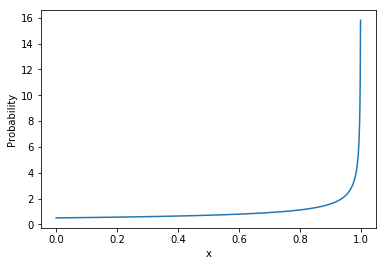

In [7]:
a,b=1,0.5
x=np.arange(0,1.001,0.001)
x_pdf=x**(a-1)*(1-x)**(b-1)*spsp.gamma(a+b)/(spsp.gamma(a)*spsp.gamma(b))

plt.plot(x,x_pdf)
plt.xlabel("x")
plt.ylabel("Probability")
plt.show()

##Q2 [5 points]

 Suppose we are interested in measuring the percentage of customers that choose our product with at least 80% probability. 
 
 Fill in the following function. Inside the function,  use Monte-Carlo integration to estimate this percentage.   

In [8]:
def Beta_prob():
  c,d=0.8,1
  np.random.seed(100)
  y=np.random.rand(1000)
  x=c+(d-c)*y
  hy=(d-c)*x**(a-1)*(1-x)**(b-1)*spsp.gamma(a+b)/(spsp.gamma(a)*spsp.gamma(b))
  
  prob=np.mean(hy)
  return (prob)

print("Required % is "+str(round(Beta_prob()*100,2))+"%")

Required % is 45.74%


##Q3 [5 points]

The expected value of $x$ for a continuous distribution is defined as 

$E(x)=\int_{-\infty}^\infty xf(x)dx$

Fill in the following function. Inside the function,  use Monte-Carlo integration to estimate this expected value.

In [9]:
def Beta_expected():
  
  lower_lim,upper_lim=0,1 
  np.random.seed(100)
  y=np.random.rand(10000)
  x=lower_lim+(upper_lim-lower_lim)*y
  hy=(upper_lim-lower_lim)*x*(x**(a-1)*(1-x)**(b-1)*spsp.gamma(a+b)/(spsp.gamma(a)*spsp.gamma(b)))
  exp=np.mean(hy)
  
  return exp

print("Expected value of the beta distribution: "+str(round(Beta_expected(),4)))

Expected value of the beta distribution: 0.6696


## Q4 [5 points]
The variance for a continuous distribution is defined as follows:

$Var(x)=\int_{-\infty}^\infty x^2 f(x)dx-(\int_{-\infty}^\infty x f(x)dx)^2$



Fill in the following function. Inside the function, use Monte-Carlo integration to estimate this variance.

In [10]:
def Beta_var():

  lower_lim,upper_lim=0,1
  np.random.seed(100)
  y=np.random.rand(10000)
  
  x=lower_lim+(upper_lim-lower_lim)*y
  hy_1,hy_2=(upper_lim-lower_lim)*x*(x**(a-1)*(1-x)**(b-1)*spsp.gamma(a+b)/(spsp.gamma(a)*spsp.gamma(b))),(upper_lim-lower_lim)*x**2*(x**(a-1)*(1-x)**(b-1)*spsp.gamma(a+b)/(spsp.gamma(a)*spsp.gamma(b)))
  var=np.mean(hy_2)-np.mean(hy_1)**2
  
  return var

print("Variance of the beta distribution is", round(Beta_var(),4))

Variance of the beta distribution is 0.0884
